# United Nations Funding Aid Report

Ian Kollipara

CS 392 Seminar in Data Science

2022.02.10

## Loading in Data

I chose to use Polars instead of Pandas as an attempt to become familiar with another library, as well as to help abstract away the concepts of data science from Pandas.

In [1]:
import polars as pl

In [2]:
df = pl.read_csv("countries.csv")

In [3]:
print(df)
print(df.columns)

shape: (167, 10)
┌─────────────┬────────────┬─────────┬────────┬─────┬───────────┬────────────┬───────────┬───────┐
│ country     ┆ child_mort ┆ exports ┆ health ┆ ... ┆ inflation ┆ life_expec ┆ total_fer ┆ gdpp  │
│ ---         ┆ ---        ┆ ---     ┆ ---    ┆     ┆ ---       ┆ ---        ┆ ---       ┆ ---   │
│ str         ┆ f64        ┆ f64     ┆ f64    ┆     ┆ f64       ┆ f64        ┆ f64       ┆ i64   │
╞═════════════╪════════════╪═════════╪════════╪═════╪═══════════╪════════════╪═══════════╪═══════╡
│ Afghanistan ┆ 90.2       ┆ 10.0    ┆ 7.58   ┆ ... ┆ 9.44      ┆ 56.2       ┆ 5.82      ┆ 553   │
├╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ Albania     ┆ 16.6       ┆ 28.0    ┆ 6.55   ┆ ... ┆ 4.49      ┆ 76.3       ┆ 1.65      ┆ 4090  │
├╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ Algeria     ┆ 27.3       ┆ 38.4    ┆ 4.17   ┆ ... ┆ 16.1      ┆ 76.5       ┆ 2.89      ┆ 4

In [4]:
df.select(pl.pearson_corr("income", "gdpp"))

income
f64
0.895571


From this we can see a strong correlation between the GDPP, or rather GDP per capita. Taking a look at this graphically...

In [5]:
import seaborn as sb

<AxesSubplot:xlabel='income', ylabel='gdpp'>

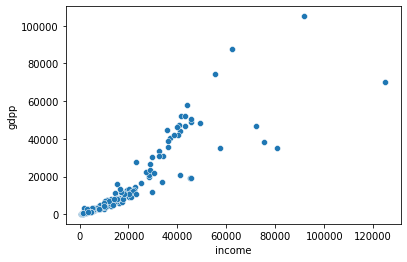

In [6]:
sb.scatterplot(x="income", y="gdpp", data=df.to_pandas())

What is found isn't necessarily interesting, but important to note. As a country's overall net income per person increases, so does the country's GDP per capita.

In [7]:
df.select(pl.pearson_corr("imports", "exports"))

imports
f64
0.737381


<AxesSubplot:xlabel='imports', ylabel='exports'>

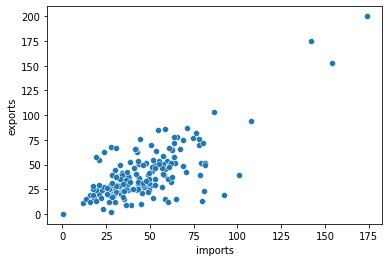

In [8]:
sb.scatterplot(x="imports", y="exports", data=df.to_pandas())

This is quite interesting, as the overall trend is linear. Meaning there is a real relationship between imports and exports. This also means that helping one has a good chance to help the other.

In [9]:
df.select(pl.pearson_corr("income", "total_fer"))

income
f64
-0.5018


In [10]:
df.select(pl.pearson_corr("total_fer", "child_mort"))

total_fer
f64
0.848478


These two statistics show that population is heavily influenced by the child mortality rate and income. Talking to my fiancée, she told that the decrease in the number of children is directly impacted by increased feminine independence and a decrease in child mortality. Both of these are shown to be true in the above correlations.

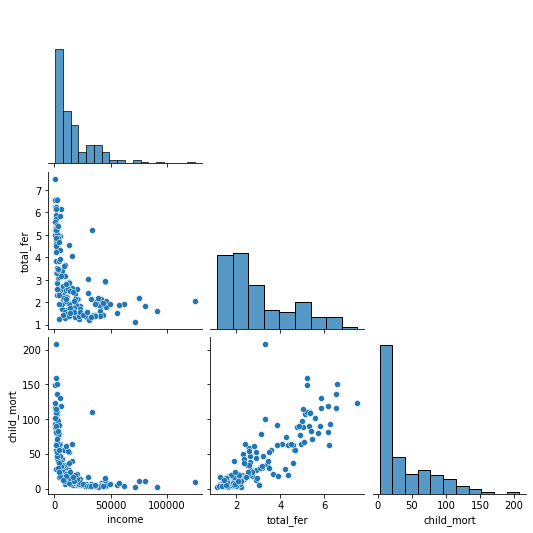

In [11]:
sb.pairplot(df[["income", "total_fer", "child_mort"]].to_pandas(), corner=True)

Looking at this, there is an absolute relationship between the values. Income and Child Mortality are inversely related, forming an "elbow graph". This is repeated with 

It also appears there is an outlier in terms of child mortality with over 200.

In [12]:
df.sort("child_mort").tail(2)

country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
str,f64,f64,f64,f64,i64,f64,f64,f64,i64
"""Sierra Leone""",160.0,16.8,13.1,34.5,1220,17.2,55.0,5.2,399
"""Haiti""",208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662


From this we can see Haiti has an insane child mortality rate, with nearly 50 more than the next worse. This is something to take note of, as the correlation between child mortality and GDP per capita is quite high. 

In [13]:
df.select(pl.pearson_corr("gdpp", "child_mort"))

gdpp
f64
-0.483032


<AxesSubplot:xlabel='gdpp', ylabel='child_mort'>

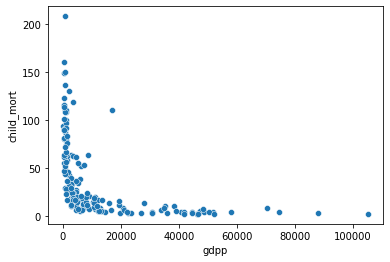

In [14]:
sb.scatterplot(x="gdpp", y="child_mort", data=df.to_pandas())

In [15]:
df.filter(pl.col("child_mort") > 100).sort("gdpp", True)[0]

country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
str,f64,f64,f64,f64,i64,f64,f64,f64,i64
"""Equatorial Guinea""",111.0,85.8,4.48,58.9,33700,24.9,60.9,5.21,17100


It appears the Equatorial Guinea is quite the oddity as its well off, but awful in health.